In [13]:
# Imports
import os
import pandas as pd
from pathlib import Path
import numpy as np
import alpaca_trade_api as tradeapi

In [14]:
from MCForecastTools import MCSimulation

In [15]:
# Load .env variables
from dotenv import load_dotenv
load_dotenv("alpaca_keys.env")

True

In [16]:
# Set alpaca key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

## Find risk and return on traditional portfolios

In [17]:
# Define assets and weights for conservative portfolio 
conservative_tickers = ['VV', 'VB', 'VXUS', 'BIV', 'BSV']
cons_weights = [.25, .2, .5 ,.4, .1]

In [18]:
# Define assets and weights for moderate portfolio
moderate_tickers = ['VV', 'VB', 'VXUS', 'VWO', 'BND']
mod_weights = [.25, .25, .15 ,.5, .30]

In [19]:
# Define assets and weights for aggressive portfolio
aggressive_tickers = ['VV', 'VB', 'VXUS', 'VWO', 'BND']
agg_weights = [.30, .30, .20 ,.1, .1]

### Find cumulative returns for Conservative portfolio since Jan 1, 2015

In [20]:
# Set timeframe to 1 day
timeframe = "1D"

# Set start and end dates
start_date = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-10', tz='America/New_York').isoformat()

# Get 6 years worth of price data
conservative_data = api.get_barset(
    conservative_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

conservative_data.head()

BIV                                   BSV         \
                            open   high    low  close    volume   open   high   
time                                                                            
2017-11-20 00:00:00-05:00    NaN    NaN    NaN    NaN       NaN  79.41  79.42   
2017-11-21 00:00:00-05:00  84.26  84.30  84.13  84.21  440780.0  79.39  79.40   
2017-11-22 00:00:00-05:00  84.28  84.48  84.23  84.42  459607.0  79.41  79.48   
2017-11-24 00:00:00-05:00  84.37  84.43  84.35  84.38  223736.0  79.43  79.46   
2017-11-27 00:00:00-05:00  84.41  84.48  84.31  84.43  424371.0  79.44  79.48   

                                                      ...      VV            \
                               low   close    volume  ...    open      high   
time                                                  ...                     
2017-11-20 00:00:00-05:00  79.3800  79.380  846212.0  ...  118.54  118.7500   
2017-11-21 00:00:00-05:00  79.3300  79.360  887800.0  ...  119.05  119.5200   
2017-11-22 00:00:00-05:00  79.3900  79.470  932371.0  ...  119.50  119.5800   
2017-11-24 00:00:00-05:00  79.4222  79.445  395388.0  ...  119.65  119.6900   
2017-11-27 00:00:00-05:00  79.4000  79.465  789211.0  ...  119.70  119.8099   

                                                       VXUS                  \
                               low   close    volume   open   high      low   
time                                                                          
2017-11-20 00:00:00-05:00  118.451  118.66  207100.0    NaN    NaN      NaN   
2017-11-21 00:00:00-05:00  119.050  119.42  121311.0  56.10  56.30  56.1000   
2017-11-22 00:00:00-05:00  119.280  119.36  111051.0  56.51  56.53  56.2250   
2017-11-24 00:00:00-05:00  119.520  119.61   71618.0  56.71  56.75  56.6267   
2017-11-27 00:00:00-05:00  119.440  119.63  122179.0  56.59  56.59  56.2600   

                                            
                           close    volume  
time                                        
2017-11-20 00:00:00-05:00    NaN       NaN  
2017-11-21 00:00:00-05:00  56.23  441686.0  
2017-11-22 00:00:00-05:00  56.40  590055.0  
2017-11-24 00:00:00-05:00  56.69  204673.0  
2017-11-27 00:00:00-05:00  56.28  576413.0  

[5 rows x 25 columns]

### Find cumulative returns for Moderate portfolio since Jan 1, 2015

In [21]:
# Set timeframe to 1 day
timeframe = "1D"

# Set start and end dates
start_date = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-10', tz='America/New_York').isoformat()

# Get 6 years worth of price data
moderate_data = api.get_barset(
    moderate_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

In [22]:
# Clean data
moderate_data = moderate_data.dropna()
moderate_data.head()

BND                                       VB  \
                            open   high     low  close     volume    open   
time                                                                        
2017-11-21 00:00:00-05:00  81.73  81.79  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.89  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.88  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.89  81.785  81.82  1291927.0  145.88   
2017-11-28 00:00:00-05:00  81.90  81.95  81.830  81.84  1726448.0  145.52   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   
2017-11-28 00:00:00-05:00  146.9100  145.2801  146.87  245509.0  ...  45.39   

                                                               VXUS         \
                            high      low  close      volume   open   high   
time                                                                         
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63   9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75   6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59   6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11   9015959.0  56.59  56.59   
2017-11-28 00:00:00-05:00  45.54  45.2300  45.40  10536681.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [24]:
MC_mod = MCSimulation(
    portfolio_data = moderate_data,
    weights = mod_weights,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [25]:
MC_mod.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002762,1.001952,1.003431,0.994856,1.000939,1.015100,0.995709,1.003344,0.988977,0.987047,...,0.997732,1.015335,0.990979,1.004734,0.998828,1.007513,0.995517,0.989126,0.996333,0.977791
2,1.008848,1.004124,1.012193,0.991148,1.001105,1.022425,0.997284,0.999400,0.990038,0.994053,...,0.990327,1.010929,0.984486,0.998206,1.007892,0.987726,0.995891,0.984204,1.003729,0.988311
3,1.003271,1.020443,1.004818,0.977892,1.005236,1.031910,0.993992,0.989548,1.002392,0.993038,...,1.007232,1.024229,0.988398,1.001729,1.017028,0.987771,0.988561,0.997730,0.987915,0.998205
4,0.999069,1.016610,1.013050,0.975827,1.000421,1.031262,0.997014,0.963907,0.987228,0.986492,...,0.986205,1.006098,0.982170,1.004154,1.012626,0.989947,0.974338,1.007001,0.985548,0.976540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,7.479586,13.565712,4.577501,16.332149,7.713826,23.223147,16.443130,16.529739,8.375610,4.442018,...,3.719802,7.415469,6.070496,8.172399,12.546830,6.408639,2.103281,7.067854,7.198427,5.384126
5037,7.508267,13.572719,4.576688,16.133395,7.605691,23.238876,16.512271,16.682458,8.327185,4.420556,...,3.665882,7.552725,6.121084,8.250231,12.519766,6.399409,2.121098,7.027441,7.242605,5.383414
5038,7.498880,13.553112,4.568535,16.230967,7.493058,23.129969,16.768187,16.424594,8.501602,4.445486,...,3.695430,7.604270,6.081153,8.219910,12.266738,6.493001,2.094949,7.189830,7.263192,5.339259
5039,7.601248,13.513647,4.547829,16.417500,7.416033,23.327276,16.945701,16.235364,8.468959,4.454196,...,3.712502,7.635952,6.091869,8.202270,12.107178,6.581652,2.095152,7.259439,7.344146,5.368272


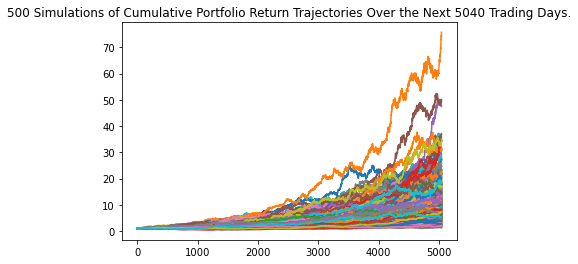

In [27]:
line_plot_mod = MC_mod.plot_simulation()

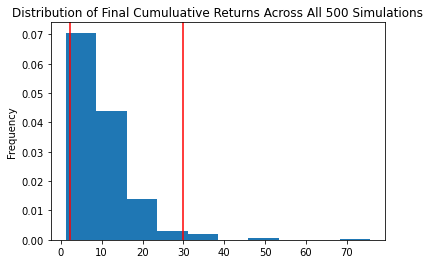

In [28]:
dist_plot_mod = MC_mod.plot_distribution()

In [29]:
tbl_moderate = MC_mod.summarize_cumulative_return()
print(tbl_moderate)

count           500.000000
mean             10.100859
std               7.470296
min               1.198007
25%               5.316221
50%               8.078472
75%              12.801702
max              75.728106
95% CI Lower      2.166617
95% CI Upper     29.861772
Name: 5040, dtype: float64


### Find cumulative returns for Aggressive portfolio since Jan 1, 2015

In [25]:
# Set timeframe to 1 day
timeframe = "1D"

# Set start and end dates
start_date = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-10', tz='America/New_York').isoformat()

# Get 6 years worth of price data
aggressive_data = api.get_barset(
    aggressive_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

aggressive_data.head()

BND                                         VB  \
                            open     high     low  close     volume    open   
time                                                                          
2017-11-20 00:00:00-05:00  81.65  81.6975  81.600  81.64  1429061.0     NaN   
2017-11-21 00:00:00-05:00  81.73  81.7900  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.8900  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.8800  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.8900  81.785  81.82  1291927.0  145.88   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-20 00:00:00-05:00       NaN       NaN     NaN       NaN  ...    NaN   
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   

                                                              VXUS         \
                            high      low  close     volume   open   high   
time                                                                        
2017-11-20 00:00:00-05:00    NaN      NaN    NaN        NaN    NaN    NaN   
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63  9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75  6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59  6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11  9015959.0  56.59  56.59   

                                                     
                               low  close    volume  
time                                                 
2017-11-20 00:00:00-05:00      NaN    NaN       NaN  
2017-11-21 00:00:00-05:00  56.1000  56.23  441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40  590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69  204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28  576413.0  

[5 rows x 25 columns]

In [8]:
# Plot portfolio returns

In [9]:
# Complete monte carlo simulation for all portfolios 
# Line plot and distribution plots for all portfolios

In [10]:
# Find and plot Beta and Sharpe Ratios for all portfolios

## Establish allocations of digital assets in our custom portfolios for the conservative, moderate, and aggressive investors

In [12]:
# Define assets and weights for conservative portfolio with 2% digital assets

In [ ]:
# Define assets and weights for moderate portfolio with 5% digital assets

In [13]:
# Define assets and weights for aggressive portfolio with 10% digital assets

In [14]:
# Find cumulative returns for all 3 portfolios with digital assets since Jan 1, 2015

In [15]:
# Plot portfolio returns

In [16]:
# Complete and plot monte carlo simulation for all portfolios 

In [17]:
# Find and plot Beta and Sharpe Ratios for all portfolios

## Compare risk and return of all portfolios and determine if the volatility of the digital assets are worth the return

In [18]:
# Plot and compare historical returns

In [19]:
# Plot and compare results of monte carlo simulations

In [ ]:
# Plot and compare beta

## Identify locales in Philadelphia market to market each custom portfolio based on demographic

In [30]:
# Define demographic parameters of target clients for each portfolio

In [31]:
# Use an API to find geographic markets for each portfolio

In [32]:
# Plot markets with Mapbox